## 1 Exploratory Data Analysis

### 1.1 Imports

In [941]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

# import pickle
import pickle

### 1.2 Data Overview

In [942]:
# Reading the dataset
df = pd.read_csv('data/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [943]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [944]:
# identify the data types
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [945]:
# identify all the nan values
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [946]:
# Display the columns with missing values
df.isna().sum()[df.isna().sum() > 0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

## 2 Missing Data

### 2.1 Finding Missing Values

In [947]:
# drop the columns with missing values more than 50%
df = df.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'MasVnrType'], axis=1)

In [948]:
# Display the columns with missing values
df.isna().sum()[df.isna().sum() > 0]

LotFrontage     259
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [949]:
df['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

### 2.2 Handling missing data

In [950]:
# display the catergorical columns with missing values
df.select_dtypes('object').isna().sum()[df.select_dtypes('object').isna().sum() > 0]

BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [951]:
# impute the missing values in the categorical columns with the mode
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['GarageFinish'] = df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual'] = df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0])
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0])

In [952]:
# Display the missing values in the numerical columns
df.select_dtypes(['int64', 'float64']).isna().sum()[df.select_dtypes(['int64', 'float64']).isna().sum() > 0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [953]:
# impute the missing in the numerical columns with the mean
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mean())
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())

In [954]:
# show the dtypes of the columns with missing values
df[df.columns[df.isnull().sum() > 0]].dtypes # no more missing values

Series([], dtype: object)

In [955]:
# identify all missing values
df.isna().sum()[df.isna().sum() > 0] # no more missing values

Series([], dtype: int64)

In [956]:
# drop the column CentralAir
df = df.drop(['CentralAir'], axis=1)

In [957]:
# identify all missing values
df.isna().sum()[df.isna().sum() > 0]

Series([], dtype: int64)

## 3 Finding Unique Values

In [958]:
# identify the unique values for categorical columns
df.select_dtypes('object').nunique()

MSZoning          5
Street            2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
Electrical        5
KitchenQual       4
Functional        7
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
SaleType          9
SaleCondition     6
dtype: int64

In [959]:
# identify the unique values for MSZoning
df['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [960]:
# identify all the unique values for utilities
df['Utilities'].unique()

array(['AllPub', 'NoSeWa'], dtype=object)

In [961]:
# identify the unique values for Condition2
df['Condition2'].unique()

array(['Norm', 'Artery', 'RRNn', 'Feedr', 'PosN', 'PosA', 'RRAn', 'RRAe'],
      dtype=object)

In [962]:
# identify the unique values for GarageType
df['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', 'Basment', '2Types'],
      dtype=object)

### 3.1 Graphs

Id                  Axes(0.125,0.814746;0.133621x0.0652542)
MSSubClass       Axes(0.285345,0.814746;0.133621x0.0652542)
LotFrontage       Axes(0.44569,0.814746;0.133621x0.0652542)
LotArea          Axes(0.606034,0.814746;0.133621x0.0652542)
OverallQual      Axes(0.766379,0.814746;0.133621x0.0652542)
OverallCond         Axes(0.125,0.736441;0.133621x0.0652542)
YearBuilt        Axes(0.285345,0.736441;0.133621x0.0652542)
YearRemodAdd      Axes(0.44569,0.736441;0.133621x0.0652542)
MasVnrArea       Axes(0.606034,0.736441;0.133621x0.0652542)
BsmtFinSF1       Axes(0.766379,0.736441;0.133621x0.0652542)
BsmtFinSF2          Axes(0.125,0.658136;0.133621x0.0652542)
BsmtUnfSF        Axes(0.285345,0.658136;0.133621x0.0652542)
TotalBsmtSF       Axes(0.44569,0.658136;0.133621x0.0652542)
1stFlrSF         Axes(0.606034,0.658136;0.133621x0.0652542)
2ndFlrSF         Axes(0.766379,0.658136;0.133621x0.0652542)
LowQualFinSF        Axes(0.125,0.579831;0.133621x0.0652542)
GrLivArea        Axes(0.285345,0.579831;

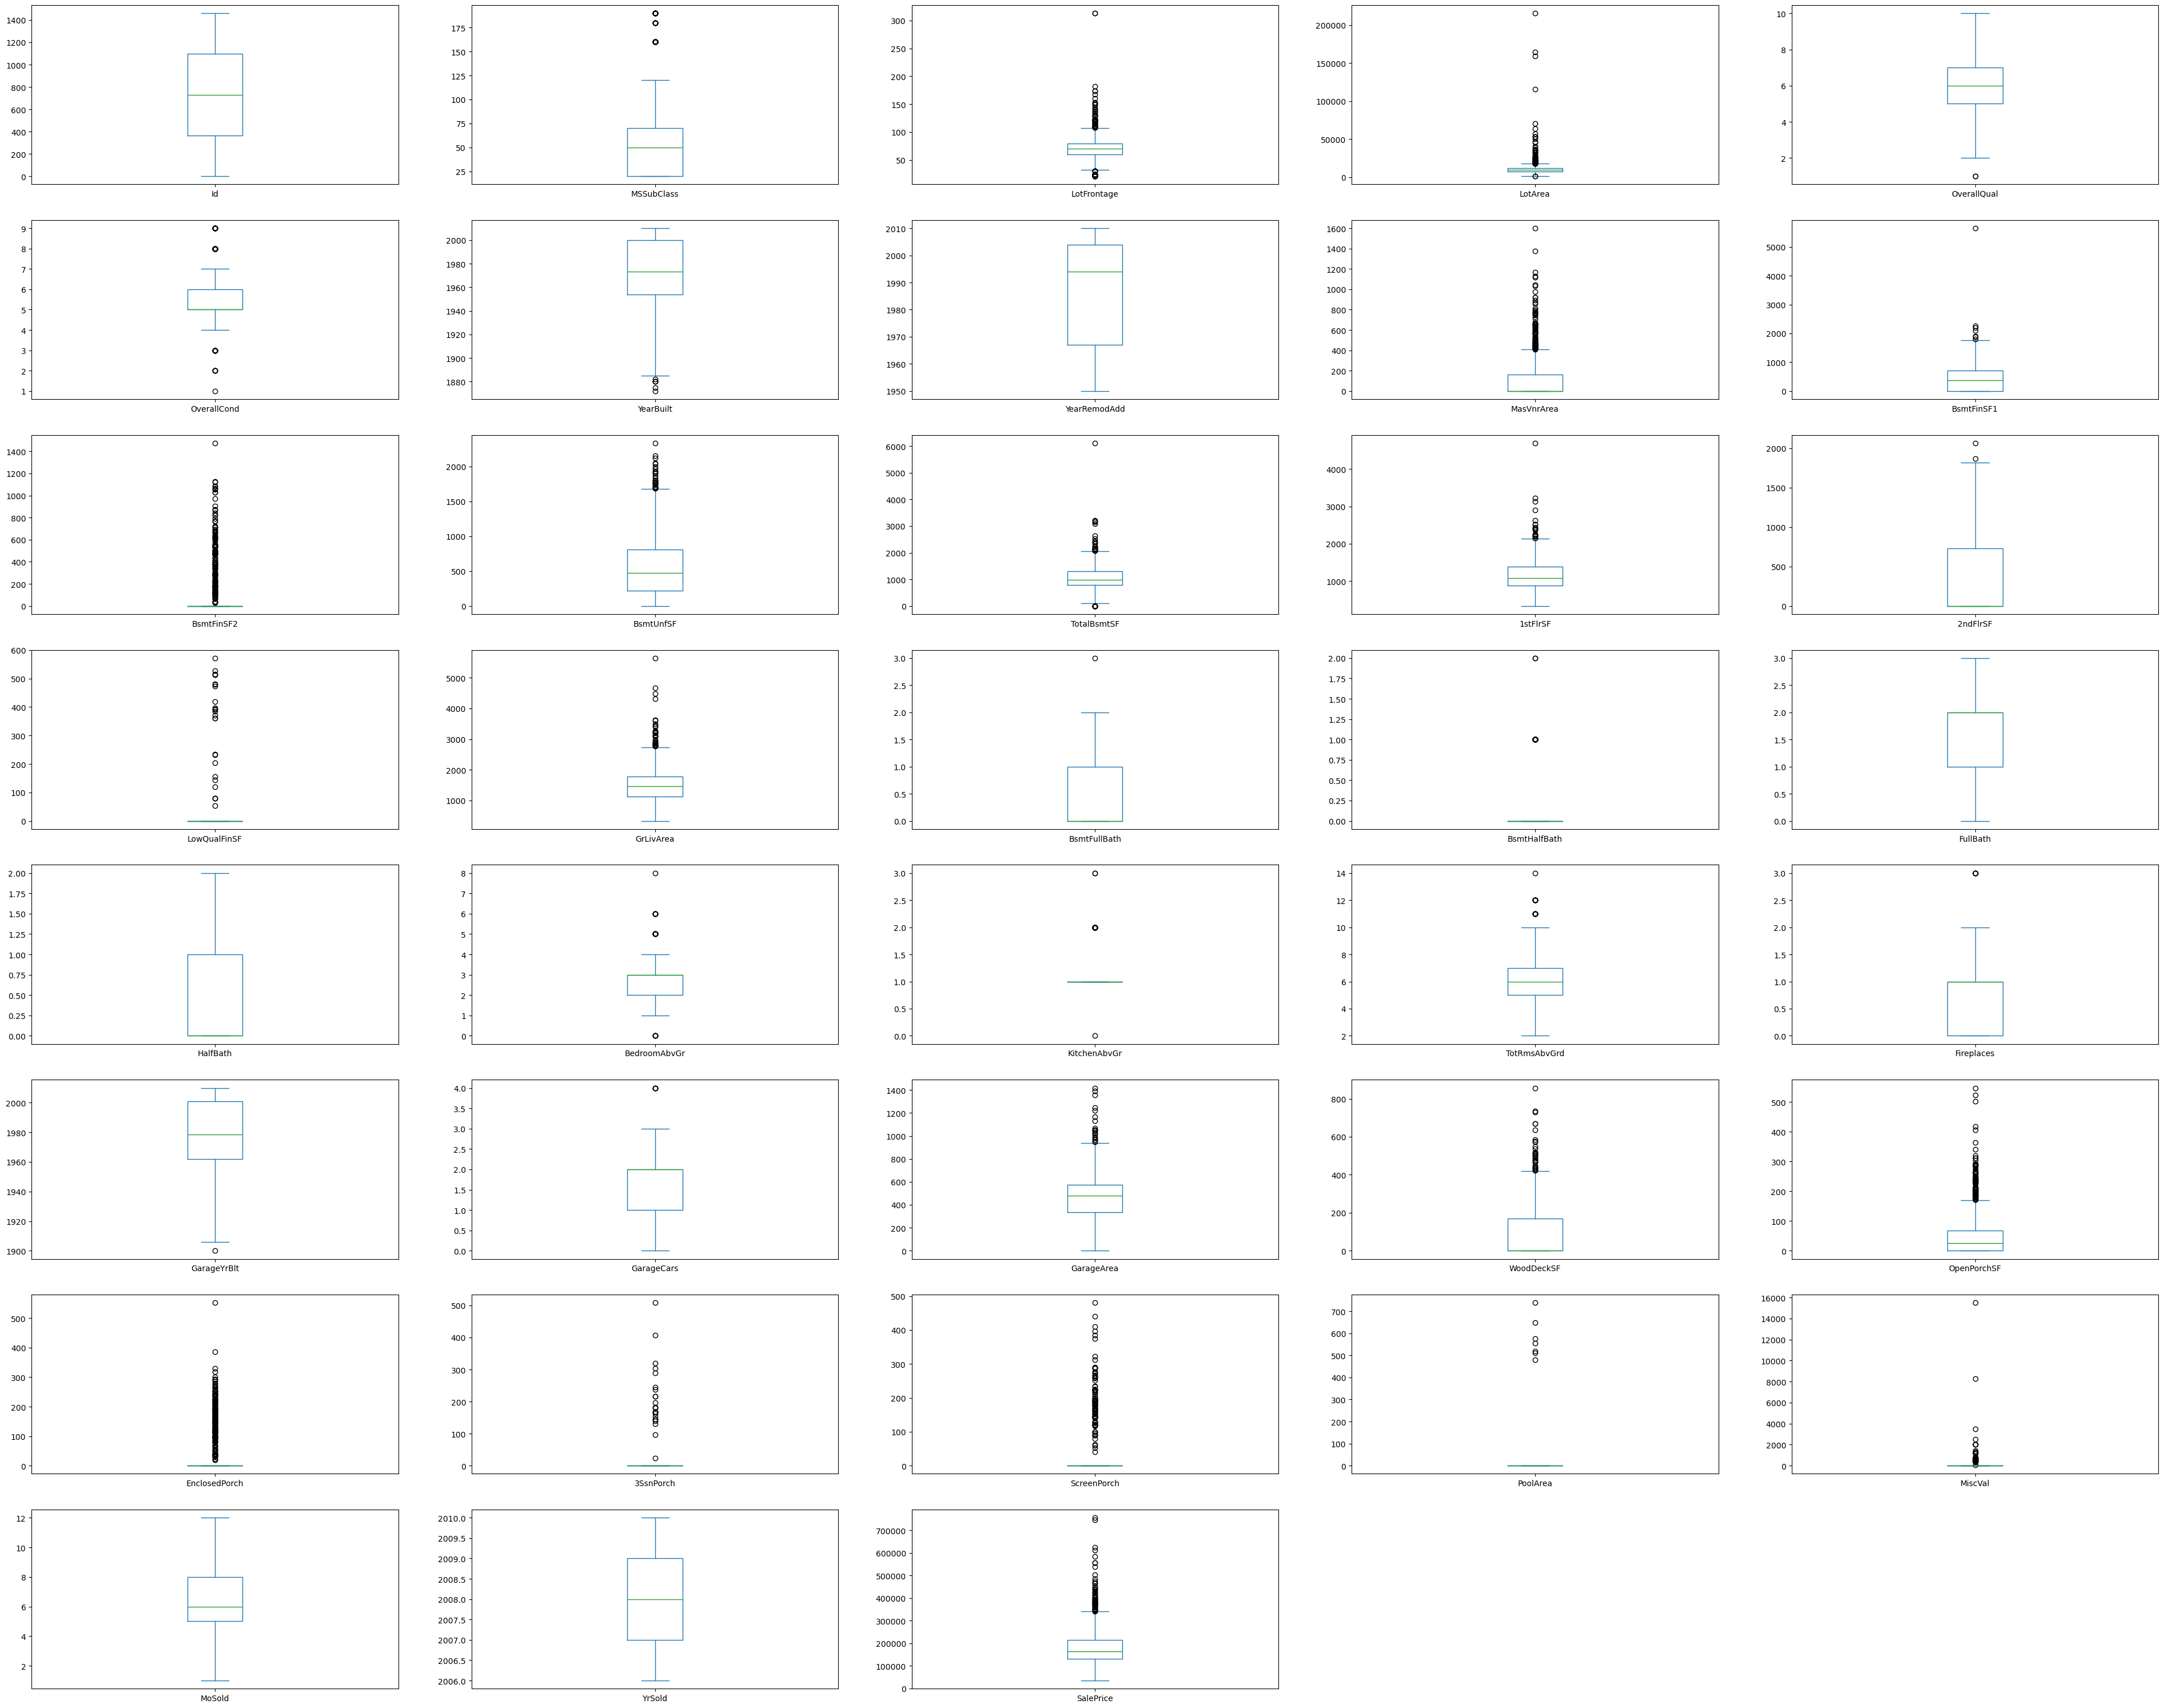

In [963]:
# box plot
df.plot(kind='box', subplots=True, layout=(10,5), sharex=False, sharey=False, figsize=(48,48))

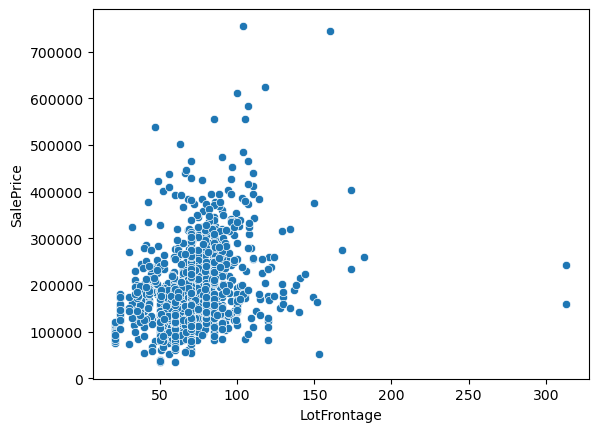

In [964]:
# scatter plot of LotFrontage and SalePrice
sns.scatterplot(x='LotFrontage', y='SalePrice', data=df)
plt.show()

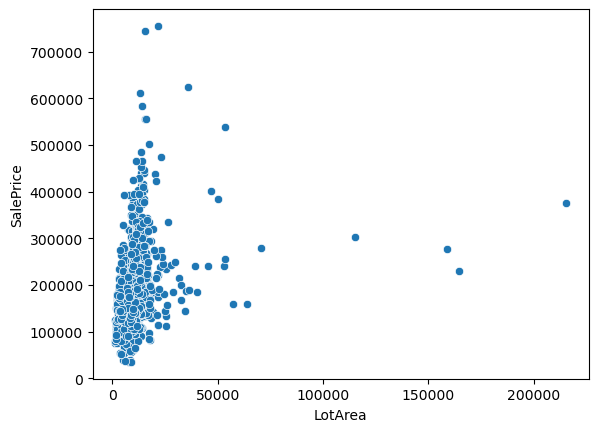

In [965]:
# scatter plot of LotArea and SalePrice
sns.scatterplot(x='LotArea', y='SalePrice', data=df)
plt.show()

In [966]:
# show all values in OverallQual
df['OverallQual'].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

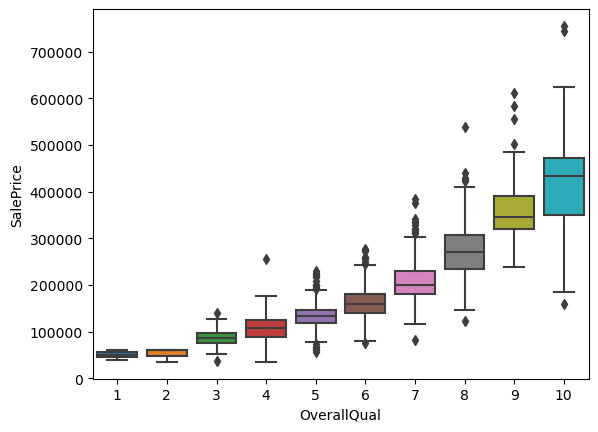

In [967]:
# draw a box plot of OverallQual and SalePrice
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.show()

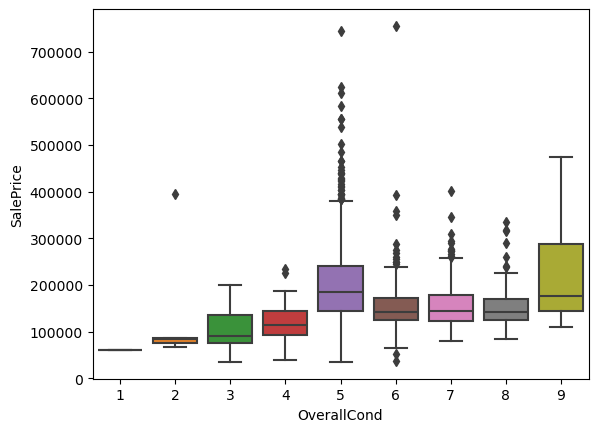

In [968]:
# draw a box plot of OverallCond and SalePrice
sns.boxplot(x='OverallCond', y='SalePrice', data=df)
plt.show()

In [969]:
# count the data point per OverallCond
df['OverallCond'].value_counts()

OverallCond
5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: count, dtype: int64

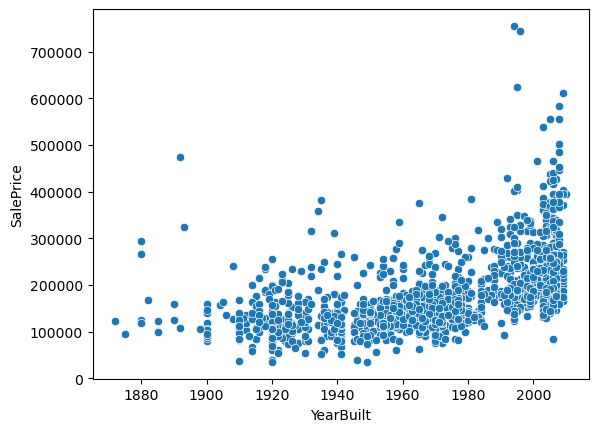

In [970]:
# scatter plot of YearBuilt and SalePrice
sns.scatterplot(x='YearBuilt', y='SalePrice', data=df)
plt.show()

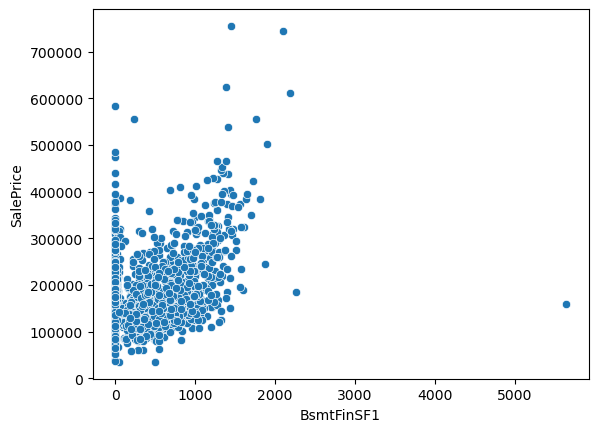

In [971]:
#  scatter plot of BsmtFinSF1 and SalePrice
sns.scatterplot(x='BsmtFinSF1', y='SalePrice', data=df)
plt.show()

### 3.2 Removing outliers

In [972]:
# drop the row with BsmtFinSF1 value over 5000
df.drop(df[df['BsmtFinSF1'] > 5000].index, inplace = True)

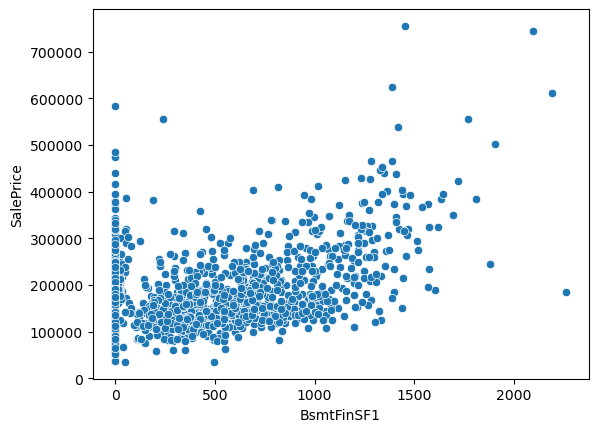

In [973]:
#  scatter plot of BsmtFinSF1 and SalePrice
sns.scatterplot(x='BsmtFinSF1', y='SalePrice', data=df)
plt.show()

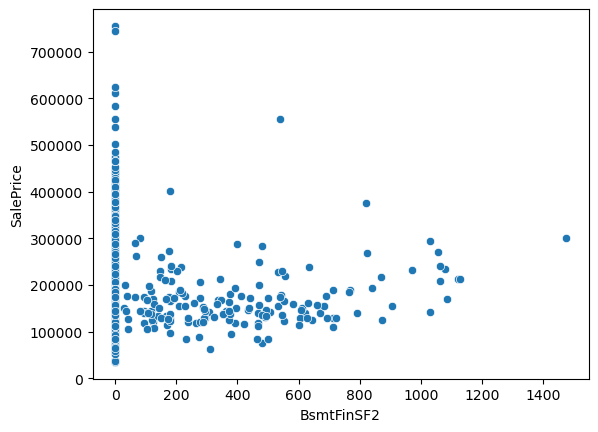

In [974]:
# scatter plot of BsmtFinSF2 and SalePrice
sns.scatterplot(x='BsmtFinSF2', y='SalePrice', data=df)
plt.show()

In [975]:
# drop the row with BsmtFinSF2 value over 1400
df.drop(df[df['BsmtFinSF2'] > 1400].index, inplace = True)

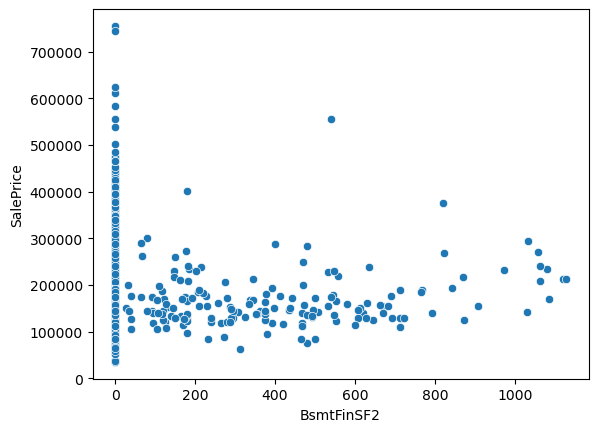

In [976]:
# scatter plot of BsmtFinSF2 and SalePrice
sns.scatterplot(x='BsmtFinSF2', y='SalePrice', data=df)
plt.show()

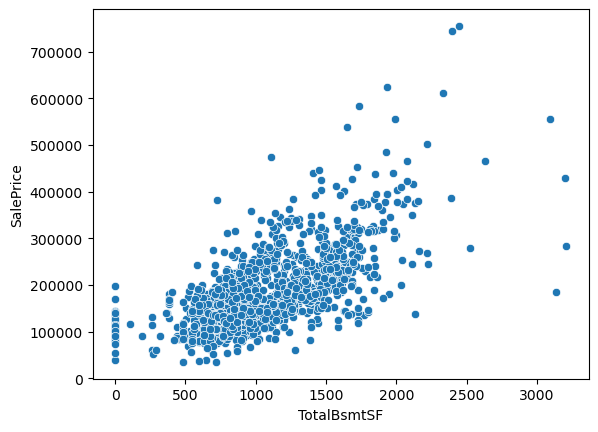

In [977]:
# scatter plot of TotalBsmtSF and SalePrice
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=df)
plt.show()

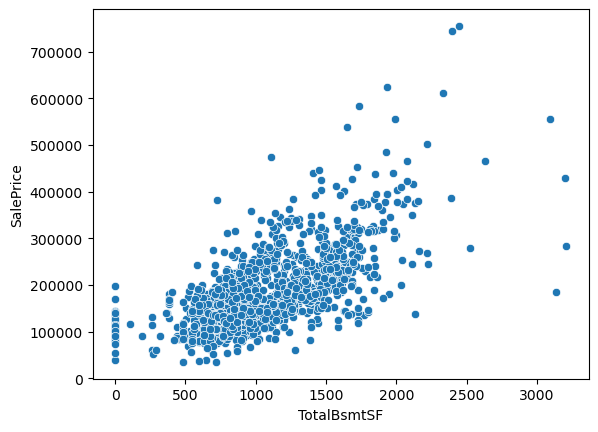

In [978]:
# draw a scatter plot of TotalBsmtSF and SalePrice
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=df)
plt.show()

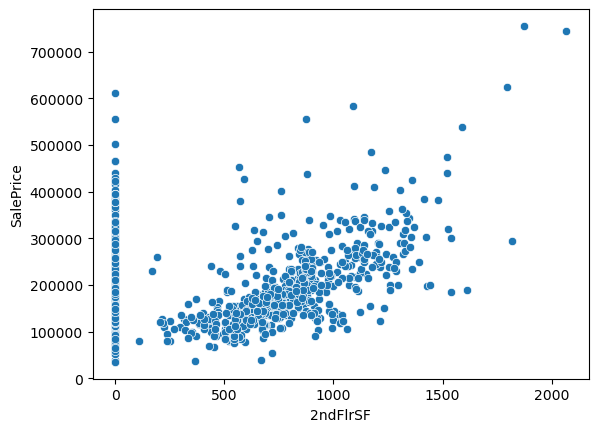

In [979]:
# draw a scatter plot of 2ndFlrSF and SalePrice
sns.scatterplot(x='2ndFlrSF', y='SalePrice', data=df)
plt.show()

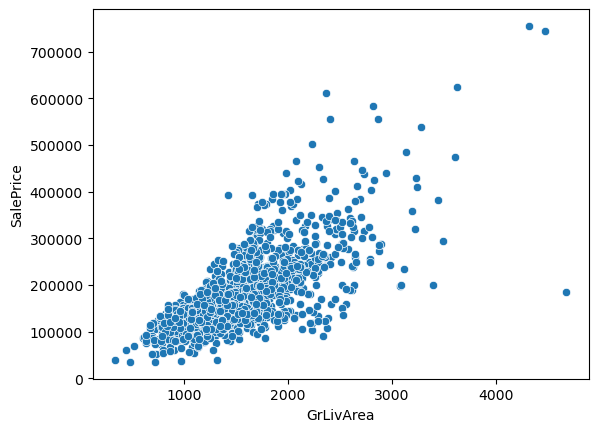

In [980]:
# draw a scatter plot of GrLivArea and SalePrice
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.show()

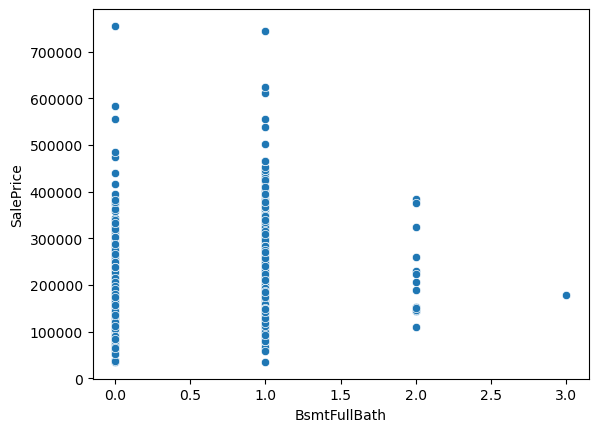

In [981]:
# draw a scatter plot of BsmtFullBath and SalePrice
sns.scatterplot(x='BsmtFullBath', y='SalePrice', data=df)
plt.show()

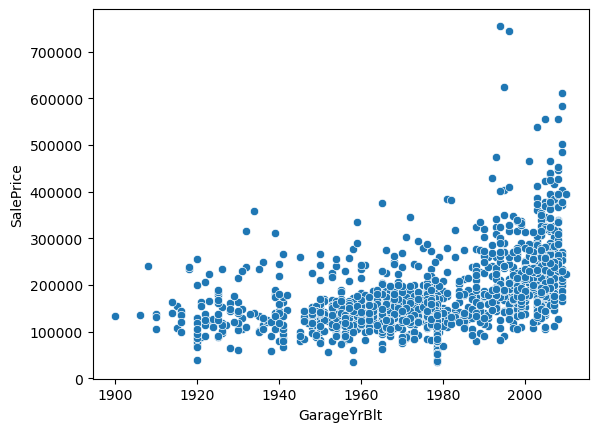

In [982]:
# scatter plot of GarageYrBlt and SalePrice
sns.scatterplot(x='GarageYrBlt', y='SalePrice', data=df)
plt.show()

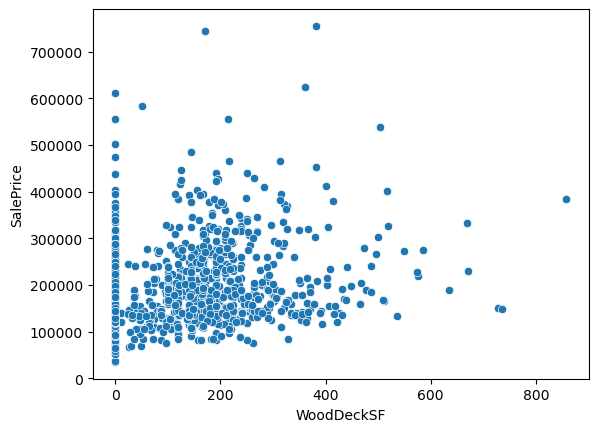

In [983]:
# draw a scatter plot of WoodDeckSF and SalePrice
sns.scatterplot(x='WoodDeckSF', y='SalePrice', data=df)
plt.show()

In [984]:
# drop the row with WoodDeckSF value over 800
df.drop(df[df['WoodDeckSF'] > 800].index, inplace = True)

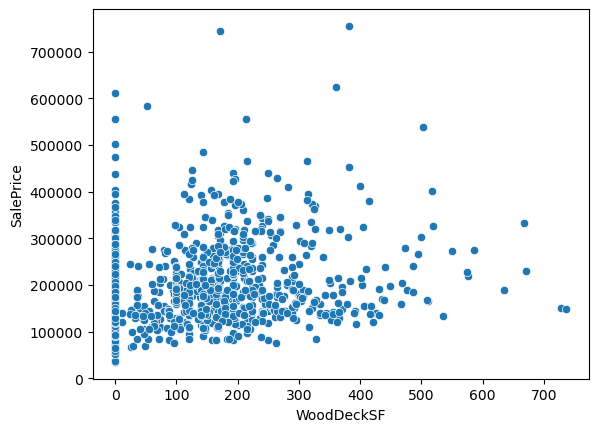

In [985]:
# draw a scatter plot of WoodDeckSF and SalePrice
sns.scatterplot(x='WoodDeckSF', y='SalePrice', data=df)
plt.show()

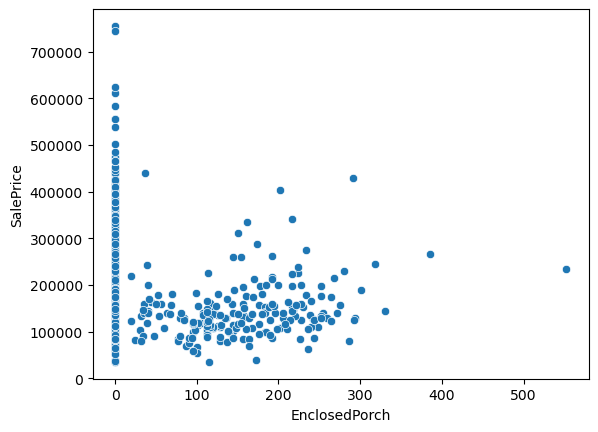

In [986]:
# draw a scatter plot of EnclosedPorch and SalePrice
sns.scatterplot(x='EnclosedPorch', y='SalePrice', data=df)
plt.show()

In [987]:
# drop the row with EnclosedPorch value over 500
df.drop(df[df['EnclosedPorch'] > 500].index, inplace = True)

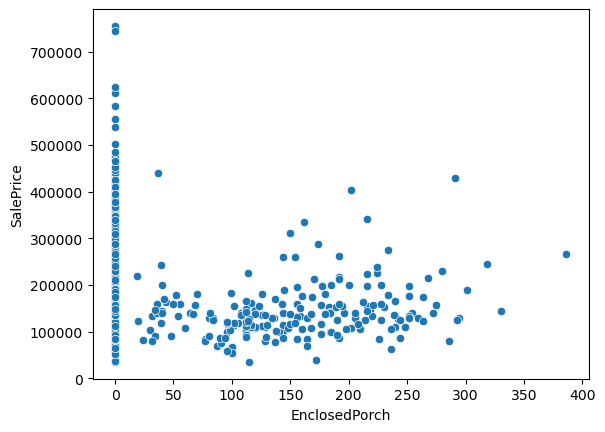

In [988]:
# draw a scatter plot of EnclosedPorch and SalePrice
sns.scatterplot(x='EnclosedPorch', y='SalePrice', data=df)
plt.show()

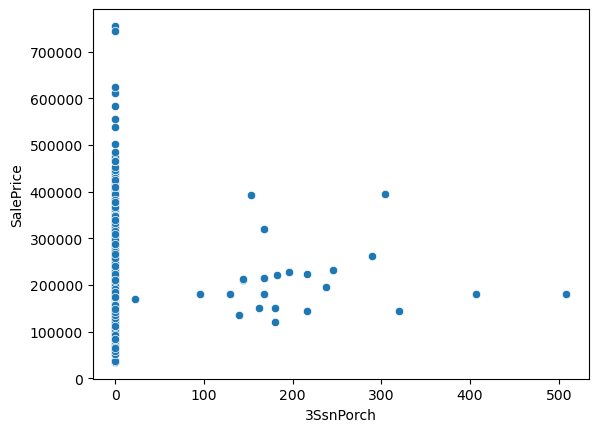

In [989]:
# draw a scatter plot of 3SsnPorch and SalePrice
sns.scatterplot(x='3SsnPorch', y='SalePrice', data=df)
plt.show()

### 3.3 Encoding Data

In [990]:
# encode the ExterQual with 0,1,2,3 and 4
df['ExterQual'] = df['ExterQual'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})


In [991]:
# encode the ExterCond with 0,1,2,3 and 4
df['ExterCond'] = df['ExterCond'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})

In [992]:
# encode the BsmtQual with 0,1,2,3,4 and 5
df['BsmtQual'] = df['BsmtQual'].map({'NA':0 ,'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

In [993]:
# encode the BsmtCond with 0,1,2,3,4 and 5
df['BsmtCond'] = df['BsmtCond'].map({'NA':0 ,'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

In [994]:
# encode BsmtExposure with 0,1,2,3 and 4
df['BsmtExposure'] = df['BsmtExposure'].map({'NA':0 ,'No':1, 'Mn':2, 'Av':3, 'Gd':4})

In [995]:
# encode BsmtFinType1 with 0,1,2,3,4,5 and 6
df['BsmtFinType1'] = df['BsmtFinType1'].map({'NA':0 ,'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})

In [996]:
# encode HeatingQC with 0,1,2,3,4 and 5
df['HeatingQC'] = df['HeatingQC'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})

In [997]:
# encode KitchenQual with 0,1,2,3, and 4
df['KitchenQual'] = df['KitchenQual'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})

In [998]:
# encode BsmtFinType2 with 0,1,2,3,4,5 and 6
df['BsmtFinType2'] = df['BsmtFinType2'].map({'NA':0 ,'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})

In [999]:
# encode GarageQual with 0,1,2,3,4, and 5
df['GarageQual'] = df['GarageQual'].map({'NA':0 ,'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

In [1000]:
# encode GarageCond with 0,1,2,3,4, and 5
df['GarageCond'] = df['GarageCond'].map({'NA':0 ,'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

In [1001]:
# show the data type of garagecond
df['GarageCond'].dtypes

dtype('int64')

In [1002]:
# encode MsZoning with 0,1,2,3,4 and 5
df['MSZoning'] = df['MSZoning'].map({'RL':0, 'RM':1, 'C (all)':2, 'FV':3, 'RH':4, 'A (agr)':5})

### 3.4 Heatmap

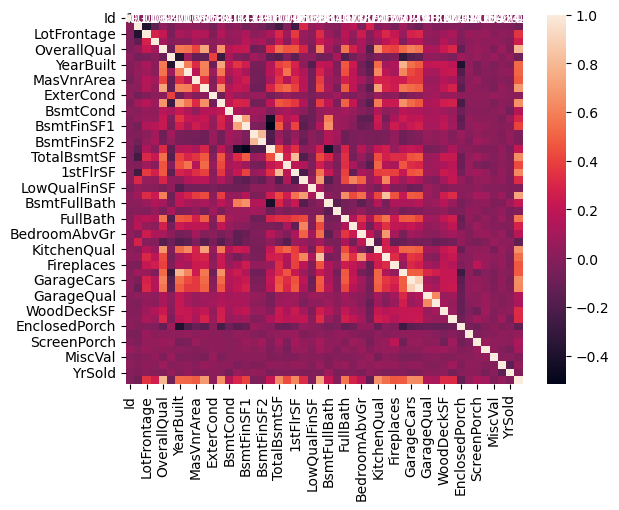

In [1003]:
# draw a heatmap
sns.heatmap(df_norm.corr(), annot=True)
plt.show()

### 3.5 Removing irrelevant columns

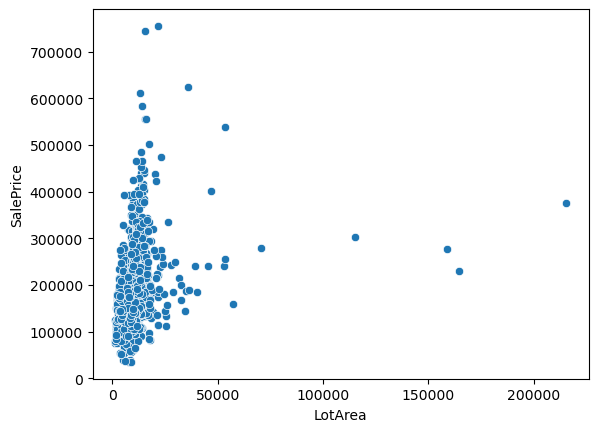

In [1004]:
# draw a scatter plot
sns.scatterplot(x='LotArea', y='SalePrice', data=df) # scatter plot of LotArea and SalePrice
plt.show() 

In [1005]:
# drop the column Lotshape
df = df.drop(['LotShape'], axis=1)

In [1006]:
# drop BsmtExposure
df = df.drop(['BsmtExposure'], axis=1)

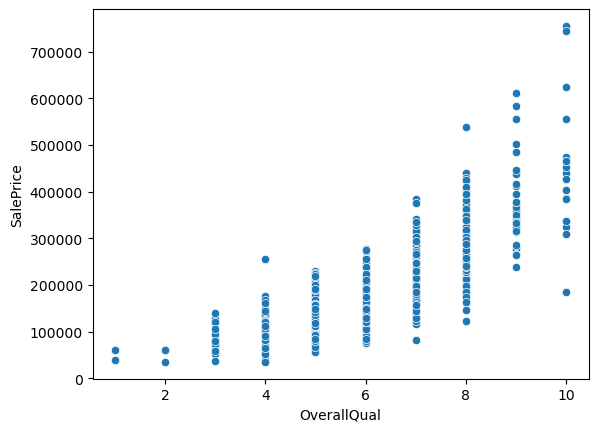

In [1007]:
# draw a scatter plot of overallQual and SalePrice
sns.scatterplot(x='OverallQual', y='SalePrice', data=df)
plt.show()

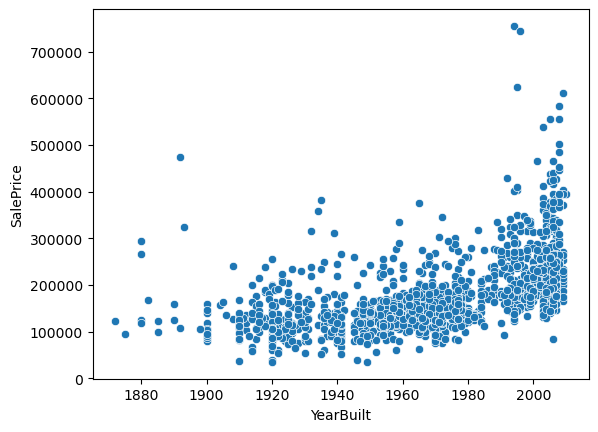

In [1008]:
# draw a scatter plot of YearBuilt and SalePrice
sns.scatterplot(x='YearBuilt', y='SalePrice', data=df)
plt.show()

In [1009]:
# # list all the unique values in each of the categorical columns
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].unique()}")

Street: ['Pave' 'Grvl']
LandContour: ['Lvl' 'Bnk' 'HLS' 'Low']
Utilities: ['AllPub' 'NoSeWa']
LotConfig: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope: ['Gtl' 'Mod' 'Sev']
Neighborhood: ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1: ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2: ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType: ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle: ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle: ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl: ['CompShg' 'Metal' 'WdShake' 'WdShngl' 'Membran' 'Tar&Grv' 'Roll']
Exterior1st: ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn'

In [1010]:
# convert the categorical columns to numerical columns using ordinal encoding
df['MSZoning'] = df['MSZoning'].map({'RL':0, 'RM':1, 'C (all)':2, 'FV':3, 'RH':4, 'A (agr)':5})
df['Street'] = df['Street'].map({'Pave':0, 'Grvl':1})
df['LandContour'] = df['LandContour'].map({'Lvl':0, 'Bnk':1, 'HLS':2, 'Low':3})
df['Utilities'] = df['Utilities'].map({'AllPub':0, 'NoSeWa':1})
df['LotConfig'] = df['LotConfig'].map({'Inside':0, 'Corner':1, 'CulDSac':2, 'FR2':3, 'FR3':4})
df['LandSlope'] = df['LandSlope'].map({'Gtl':0, 'Mod':1, 'Sev':2})
df['Neighborhood'] = df['Neighborhood'].map({'CollgCr':0, 'Veenker':1, 'Crawfor':2, 'NoRidge':3, 'Mitchel':4,
       'Somerst':5, 'NWAmes':6, 'OldTown':7, 'BrkSide':8, 'Sawyer':9, 'NridgHt':10,
       'NAmes':11, 'SawyerW':12, 'IDOTRR':13, 'MeadowV':14, 'Edwards':15, 'Timber':16,
       'Gilbert':17, 'StoneBr':18, 'ClearCr':19, 'NPkVill':20, 'Blmngtn':21, 'BrDale':22,
       'SWISU':23, 'Blueste':24})
df['Condition1'] = df['Condition1'].map({'Norm':0, 'Feedr':1, 'PosN':2, 'Artery':3, 'RRAe':4, 'PosA':5,
       'RRNn':6, 'RRAn':7, 'RRNe':8})
df['Condition2'] = df['Condition2'].map({'Norm':0, 'Artery':1, 'RRNn':2, 'Feedr':3, 'PosN':4, 'PosA':5,
       'RRAn':6, 'RRAe':7})
df['BldgType'] = df['BldgType'].map({'1Fam':0, '2fmCon':1, 'Duplex':2, 'Twnhs':3, 'TwnhsE':4})
df['HouseStyle'] = df['HouseStyle'].map({'1Story':0, '1.5Fin':1, '1.5Unf':2, '2Story':3, '2.5Fin':4, '2.5Unf':5,
       'SFoyer':6, 'SLvl':7})
df['RoofStyle'] = df['RoofStyle'].map({'Gable':0, 'Hip':1, 'Gambrel':2, 'Mansard':3, 'Flat':4, 'Shed':5})
df['RoofMatl'] = df['RoofMatl'].map({'CompShg':0, 'WdShngl':1, 'Metal':2, 'WdShake':3, 'ClyTile':4, 'Membran':5,
       'Roll':6, 'Tar&Grv':7})
df['Exterior1st'] = df['Exterior1st'].map({'VinylSd':0, 'HdBoard':1, 'MetalSd':2, 'Wd Sdng':3, 'Plywood':4, 'CemntBd':5,
       'BrkFace':6, 'WdShing':7, 'AsbShng':8, 'Stucco':9, 'BrkComm':10, 'AsphShn':11, 'Stone':12,
       'ImStucc':13})
df['Exterior2nd'] = df['Exterior2nd'].map({'VinylSd':0, 'HdBoard':1, 'MetalSd':2, 'Wd Sdng':3, 'Plywood':4, 'CmentBd':5,
       'Wd Shng':6, 'BrkFace':7, 'Stucco':8, 'AsbShng':9, 'Brk Cmn':10, 'ImStucc':11, 'AsphShn':12,
       'Stone':13, 'Other':14})
df['ExterQual'] = df['ExterQual'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
df['ExterCond'] = df['ExterCond'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
df['Foundation'] = df['Foundation'].map({'PConc':0, 'CBlock':1, 'BrkTil':2, 'Wood':3, 'Slab':4, 'Stone':5})
df['BsmtQual'] = df['BsmtQual'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
df['BsmtCond'] = df['BsmtCond'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
df['BsmtFinType1'] = df['BsmtFinType1'].map({'Unf':0, 'LwQ':1, 'Rec':2, 'BLQ':3, 'ALQ':4, 'GLQ':5})
df['BsmtFinType2'] = df['BsmtFinType2'].map({'Unf':0, 'LwQ':1, 'Rec':2, 'BLQ':3, 'ALQ':4, 'GLQ':5})
df['HeatingQC'] = df['HeatingQC'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
df['Electrical'] = df['Electrical'].map({'Mix':0, 'FuseP':1, 'FuseF':2, 'FuseA':3, 'SBrkr':4})
df['KitchenQual'] = df['KitchenQual'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
df['Functional'] = df['Functional'].map({'Sal':0, 'Sev':1, 'Maj2':2, 'Maj1':3, 'Mod':4, 'Min2':5, 'Min1':6, 'Typ':7})
df['GarageType'] = df['GarageType'].map({'Detchd':0, 'CarPort':1, 'BuiltIn':2, 'Attchd':3, 'Basment':4, '2Types':5})
df['GarageFinish'] = df['GarageFinish'].map({'Unf':0, 'RFn':1, 'Fin':2})
df['GarageQual'] = df['GarageQual'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
df['GarageCond'] = df['GarageCond'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
df['PavedDrive'] = df['PavedDrive'].map({'N':0, 'P':1, 'Y':2})
df['SaleType'] = df['SaleType'].map({'WD':0, 'CWD':1, 'VWD':2, 'New':3, 'COD':4, 'Con':5, 'ConLw':6, 'ConLI':7, 'ConLD':8, 'Oth':9})
df['SaleCondition'] = df['SaleCondition'].map({'Normal':0, 'Abnorml':1, 'AdjLand':2, 'Alloca':3, 'Family':4, 'Partial':5})
df['Heating'] = df['Heating'].map({'GasA':0, 'GasW':1, 'Grav':2, 'Wall':3, 'OthW':4})


In [1011]:
# display columns which are not numerical
df.select_dtypes('object').columns

Index([], dtype='object')

In [1012]:
# construct X all the features except SalePrice and y for the model
X = df.drop('SalePrice', axis=1) # features
y = df['SalePrice'] # target

## 4 Data Spliting

In [1013]:
# training and testing split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Removing columns

#### Training data

In [1015]:
# drop BsmtExposure in the training and testing set

#X_train = X_train.drop(['BsmtExposure'], axis=1)
#X_test = X_test.drop(['BsmtExposure'], axis=1)

In [1016]:
# drop the column Lotshape in the training and testing set

#X_train = X_train.drop(['LotShape'], axis=1)
#X_test = X_test.drop(['LotShape'], axis=1)

In [1018]:
# drop the column CentralAir in the training and testing set

#X_train = X_train.drop(['CentralAir'], axis=1)
#X_test = X_test.drop(['CentralAir'], axis=1)

In [1019]:
# drop the row with EnclosedPorch value over 500
#df.drop(df[df['EnclosedPorch'] > 500].index, inplace = True)

In [1020]:
# drop the row with WoodDeckSF value over 800
#df.drop(df[df['WoodDeckSF'] > 800].index, inplace = True)

In [1021]:
# drop the row with BsmtFinSF2 value over 1400
#df.drop(df[df['BsmtFinSF2'] > 1400].index, inplace = True)

In [1022]:
# drop the row with BsmtFinSF1 value over 5000
#df.drop(df[df['BsmtFinSF1'] > 5000].index, inplace = True)

### 4.1 Finding missing values

#### 4.1.1 Training data

In [1023]:
# missing values in X_train
X_train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning         1019
LotFrontage         0
LotArea             0
                 ... 
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
Length: 71, dtype: int64

#### Removing outliers

In [1024]:
# remove all the rows with missing values above 50%
X_train.dropna(axis=0, thresh=0.5*len(X_train), inplace=True)

In [1025]:
# display all the missing values in X_train
X_train.isnull().sum()[X_train.isnull().sum() > 0]

Series([], dtype: int64)

In [1026]:
# identify the missing values in the categorical columns
X_train.select_dtypes('object').isna().sum()[X_train.select_dtypes('object').isna().sum() > 0]

Series([], dtype: float64)

In [1027]:
# idnetify the missing values in the numerical columns
X_train.select_dtypes(['int64', 'float64']).isna().sum()[X_train.select_dtypes(['int64', 'float64']).isna().sum() > 0]

Series([], dtype: int64)

#### 4.1.2 Testing data

In [1028]:
# missing values in X_test
X_test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning         437
LotFrontage        0
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
Length: 71, dtype: int64

In [1029]:
# identify the missing values in the categorical columns
X_test.select_dtypes('object').isna().sum()[X_test.select_dtypes('object').isna().sum() > 0]

Series([], dtype: float64)

In [1030]:
# identify the missing values in the numerical columns
X_test.select_dtypes(['int64', 'float64']).isna().sum()[X_test.select_dtypes(['int64', 'float64']).isna().sum() > 0]

MSZoning        437
ExterQual       437
ExterCond       437
BsmtQual        437
BsmtCond        437
BsmtFinType1    437
BsmtFinType2    437
HeatingQC       437
KitchenQual     437
GarageQual      437
GarageCond      437
dtype: int64

In [1031]:
# impute the missing values in the numerical columns with the mean
X_test['MSZoning'] = X_test['MSZoning'].fillna(X_test['MSZoning'].mean())
X_test['Street'] = X_test['Street'].fillna(X_test['Street'].mean())
X_test['LandContour'] = X_test['LandContour'].fillna(X_test['LandContour'].mean())
X_test['Utilities'] = X_test['Utilities'].fillna(X_test['Utilities'].mean())
X_test['LotConfig'] = X_test['LotConfig'].fillna(X_test['LotConfig'].mean())
X_test['LandSlope'] = X_test['LandSlope'].fillna(X_test['LandSlope'].mean())
X_test['Neighborhood'] = X_test['Neighborhood'].fillna(X_test['Neighborhood'].mean())
X_test['Condition1'] = X_test['Condition1'].fillna(X_test['Condition1'].mean())
X_test['Condition2'] = X_test['Condition2'].fillna(X_test['Condition2'].mean())
X_test['BldgType'] = X_test['BldgType'].fillna(X_test['BldgType'].mean())  
X_test['HouseStyle'] = X_test['HouseStyle'].fillna(X_test['HouseStyle'].mean())
X_test['RoofStyle'] = X_test['RoofStyle'].fillna(X_test['RoofStyle'].mean())
X_test['RoofMatl'] = X_test['RoofMatl'].fillna(X_test['RoofMatl'].mean())
X_test['Exterior1st'] = X_test['Exterior1st'].fillna(X_test['Exterior1st'].mean())
X_test['Exterior2nd'] = X_test['Exterior2nd'].fillna(X_test['Exterior2nd'].mean())
X_test['ExterQual'] = X_test['ExterQual'].fillna(X_test['ExterQual'].mean())
X_test['ExterCond'] = X_test['ExterCond'].fillna(X_test['ExterCond'].mean())
X_test['Foundation'] = X_test['Foundation'].fillna(X_test['Foundation'].mean())
X_test['GarageType'] = X_test['GarageType'].fillna(X_test['GarageType'].mean())
X_test['GarageFinish'] = X_test['GarageFinish'].fillna(X_test['GarageFinish'].mean())
X_test['GarageQual'] = X_test['GarageQual'].fillna(X_test['GarageQual'].mean())
X_test['GarageCond'] = X_test['GarageCond'].fillna(X_test['GarageCond'].mean())
X_test['PavedDrive'] = X_test['PavedDrive'].fillna(X_test['PavedDrive'].mean())
X_test['SaleType'] = X_test['SaleType'].fillna(X_test['SaleType'].mean())
X_test['SaleCondition'] = X_test['SaleCondition'].fillna(X_test['SaleCondition'].mean())

In [1032]:
# display all the missing values in X_test
X_test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning         437
LotFrontage        0
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
Length: 71, dtype: int64

In [1033]:
# fit the model with multiple linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

ValueError: Found array with 0 sample(s) (shape=(0, 71)) while a minimum of 1 is required by LinearRegression.

In [ ]:
# Step 3: Evaluate the model
from sklearn import metrics

y_pred = model.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

# Step 4: Save the model
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Step 5: Use the model for predictions
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)

y_pred = model.predict(X_test)

print(y_pred)

In [ ]:
# Example of checking for NaNs in individual columns
for col in X_train.columns:
    print(f"Column: {col}, NaN count: {X_train[col].isnull().sum()}")


Column: Id, NaN count: 0
Column: MSSubClass, NaN count: 0
Column: LotFrontage, NaN count: 0
Column: LotArea, NaN count: 0
Column: OverallQual, NaN count: 0
Column: OverallCond, NaN count: 0
Column: YearBuilt, NaN count: 0
Column: YearRemodAdd, NaN count: 0
Column: MasVnrArea, NaN count: 0
Column: ExterQual, NaN count: 0
Column: ExterCond, NaN count: 0
Column: BsmtQual, NaN count: 0
Column: BsmtCond, NaN count: 0
Column: BsmtFinType1, NaN count: 0
Column: BsmtFinSF1, NaN count: 0
Column: BsmtFinType2, NaN count: 0
Column: BsmtFinSF2, NaN count: 0
Column: BsmtUnfSF, NaN count: 0
Column: TotalBsmtSF, NaN count: 0
Column: HeatingQC, NaN count: 0
Column: 1stFlrSF, NaN count: 0
Column: 2ndFlrSF, NaN count: 0
Column: LowQualFinSF, NaN count: 0
Column: GrLivArea, NaN count: 0
Column: BsmtFullBath, NaN count: 0
Column: BsmtHalfBath, NaN count: 0
Column: FullBath, NaN count: 0
Column: HalfBath, NaN count: 0
Column: BedroomAbvGr, NaN count: 0
Column: KitchenAbvGr, NaN count: 0
Column: KitchenQual

In [ ]:
from sklearn.linear_model import LinearRegression

# Attempt to fit the model with cleaned data
reg = LinearRegression().fit(X_train, y_train)


In [ ]:
# what are the NaN values in input X
X_train.isna().sum()[X_train.isna().sum() > 0] 

Series([], dtype: int64)

In [ ]:
# train the model
reg = LinearRegression().fit(X_train, y_train)

# make predictions  
y_pred = reg.predict(X_test)

In [ ]:
# evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.23422704048634094
Mean Squared Error: 0.13050992087585034
Root Mean Squared Error: 0.3612615685010659


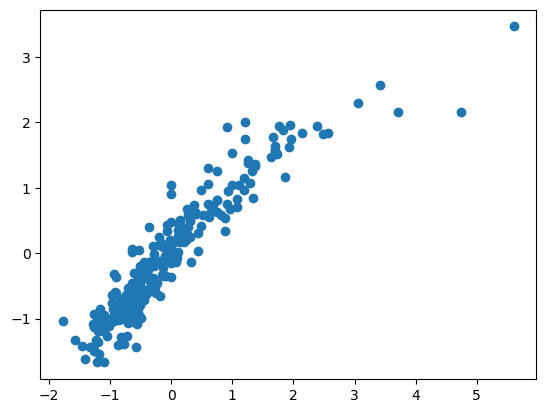

In [ ]:
# plot the predictions
plt.scatter(y_test, y_pred)
plt.show()

In [ ]:
# use the trained model to make predictions
y_pred = reg.predict(X_test)

# fit the model
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
# evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.23422704048634094
Mean Squared Error: 0.13050992087585034
Root Mean Squared Error: 0.3612615685010659


In [ ]:
# reg score
reg.score(X_test, y_test)

0.868457880611931

In [ ]:
# how many columns are in the dataframe
len(df.columns)

72

In [ ]:
len(y_pred)

292

In [ ]:
# how many values are there in X_test
len(X_test)

292

## Make predictions

In [ ]:
# load the testing data for prediction
df_test = pd.read_csv('data/test.csv')

In [ ]:
df_test.shape

(1459, 80)

In [ ]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
# display only the columns with missing values
df_test.isna().sum()[df_test.isna().sum() > 0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [ ]:
# drop the columns with missing values above 50%
df_test = df_test.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'MasVnrType'], axis=1)

In [ ]:
# display only the columns with missing values
df_test.isna().sum()[df_test.isna().sum() > 0]

MSZoning          4
LotFrontage     227
Utilities         2
Exterior1st       1
Exterior2nd       1
MasVnrArea       15
BsmtQual         44
BsmtCond         45
BsmtExposure     44
BsmtFinType1     42
BsmtFinSF1        1
BsmtFinType2     42
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
KitchenQual       1
Functional        2
GarageType       76
GarageYrBlt      78
GarageFinish     78
GarageCars        1
GarageArea        1
GarageQual       78
GarageCond       78
SaleType          1
dtype: int64

In [ ]:
# display the catergorical columns with missing values
df_test.select_dtypes('object').isna().sum()[df_test.select_dtypes('object').isna().sum() > 0]

MSZoning         4
Utilities        2
Exterior1st      1
Exterior2nd      1
BsmtQual        44
BsmtCond        45
BsmtExposure    44
BsmtFinType1    42
BsmtFinType2    42
KitchenQual      1
Functional       2
GarageType      76
GarageFinish    78
GarageQual      78
GarageCond      78
SaleType         1
dtype: int64

In [ ]:
# impute the missing values in the categorical columns with the mode
df_test['MSZoning'] = df_test['MSZoning'].fillna(df_test['MSZoning'].mode()[0])
df_test['Utilities'] = df_test['Utilities'].fillna(df_test['Utilities'].mode()[0])
df_test['Exterior1st'] = df_test['Exterior1st'].fillna(df_test['Exterior1st'].mode()[0])
df_test['Exterior2nd'] = df_test['Exterior2nd'].fillna(df_test['Exterior2nd'].mode()[0])
df_test['BsmtQual'] = df_test['BsmtQual'].fillna(df_test['BsmtQual'].mode()[0])
df_test['BsmtCond'] = df_test['BsmtCond'].fillna(df_test['BsmtCond'].mode()[0])
df_test['BsmtExposure'] = df_test['BsmtExposure'].fillna(df_test['BsmtExposure'].mode()[0])
df_test['BsmtFinType1'] = df_test['BsmtFinType1'].fillna(df_test['BsmtFinType1'].mode()[0])
df_test['BsmtFinType2'] = df_test['BsmtFinType2'].fillna(df_test['BsmtFinType2'].mode()[0])
df_test['KitchenQual'] = df_test['KitchenQual'].fillna(df_test['KitchenQual'].mode()[0])
df_test['Functional'] = df_test['Functional'].fillna(df_test['Functional'].mode()[0])
df_test['GarageType'] = df_test['GarageType'].fillna(df_test['GarageType'].mode()[0])
df_test['GarageFinish'] = df_test['GarageFinish'].fillna(df_test['GarageFinish'].mode()[0])
df_test['GarageQual'] = df_test['GarageQual'].fillna(df_test['GarageQual'].mode()[0])
df_test['GarageCond'] = df_test['GarageCond'].fillna(df_test['GarageCond'].mode()[0])
df_test['SaleType'] = df_test['SaleType'].fillna(df_test['SaleType'].mode()[0])

In [ ]:
# display the missing values in the numerical columns
df_test.select_dtypes(['int64', 'float64']).isna().sum()[df_test.select_dtypes(['int64', 'float64']).isna().sum() > 0]

LotFrontage     227
MasVnrArea       15
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt      78
GarageCars        1
GarageArea        1
dtype: int64

In [ ]:
# impute the missing in the numerical columns with the mean
df_test['LotFrontage'] = df_test['LotFrontage'].fillna(df_test['LotFrontage'].mean())
df_test['MasVnrArea'] = df_test['MasVnrArea'].fillna(df_test['MasVnrArea'].mean())
df_test['BsmtFinSF1'] = df_test['BsmtFinSF1'].fillna(df_test['BsmtFinSF1'].mean())
df_test['BsmtFinSF2'] = df_test['BsmtFinSF2'].fillna(df_test['BsmtFinSF2'].mean())
df_test['BsmtUnfSF'] = df_test['BsmtUnfSF'].fillna(df_test['BsmtUnfSF'].mean())
df_test['TotalBsmtSF'] = df_test['TotalBsmtSF'].fillna(df_test['TotalBsmtSF'].mean())
df_test['BsmtFullBath'] = df_test['BsmtFullBath'].fillna(df_test['BsmtFullBath'].mean())
df_test['BsmtHalfBath'] = df_test['BsmtHalfBath'].fillna(df_test['BsmtHalfBath'].mean())
df_test['GarageYrBlt'] = df_test['GarageYrBlt'].fillna(df_test['GarageYrBlt'].mean())
df_test['GarageCars'] = df_test['GarageCars'].fillna(df_test['GarageCars'].mean())
df_test['GarageArea'] = df_test['GarageArea'].fillna(df_test['GarageArea'].mean())

In [ ]:
# show the number of missing values in each column
df_test.isna().sum()[df_test.isna().sum() > 0]

Series([], dtype: int64)

In [ ]:
# show all the columns with unique values
df_test.nunique()

Id               1459
MSSubClass         16
MSZoning            5
LotFrontage       116
LotArea          1106
                 ... 
MiscVal            26
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
Length: 74, dtype: int64

In [ ]:
# load the trained model
reg = pickle.load(open('model.pkl', 'rb'))

In [ ]:
# Example of preparing training data
X_train = df.drop('SalePrice', axis=1)  # Assuming 'target_column' is your target variable
y_train = df['SalePrice']


In [ ]:
print(X_train.dtypes)
print(y_train.unique())

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 71, dtype: object
[208500 181500 223500 140000 250000 143000 307000 200000 129900 118000
 129500 345000 144000 279500 157000 132000 149000  90000 159000 139000
 325300 139400 230000 154000 256300 134800 306000 207500  68500  40000
 149350 179900 165500 277500 309000 145000 153000 109000  82000 160000
 170000 130250 141000 319900 239686 249700 113000 127000 177000 114500
 110000 130000 180500 172500 196500 438780 124900 158000 101000 202500
 219500 317000 180000 226000  80000 225000 244000 185000 144900 107400
  91000 135750 136500 193500 153500 245000 126500 168500 260000 174000
 164500  85000 123600 109900  98600 163500 133900 204750 214000  94750
  83000 128950 205000 178000 118964 198900 169500 100000 115

In [ ]:
# display all the non-numeric columns
X_train.select_dtypes(['object']).columns

Index(['MSZoning', 'Street', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'Foundation', 'Heating', 'Electrical', 'Functional', 'GarageType',
       'GarageFinish', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
import pandas as pd

# Assuming df_train is your DataFrame for training data
print(X_train.columns)

# Convert categorical columns to numerical using one-hot encoding
X_train_encoded = pd.get_dummies(X_train, columns=['MSZoning', 'Street', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'Foundation', 'Heating', 'Electrical', 'Functional', 'GarageType',
       'GarageFinish', 'PavedDrive', 'SaleType', 'SaleCondition'])

# Print the encoded DataFrame
print(X_train_encoded.head())
print(X_train_encoded.dtypes)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'Po

### Encoding the testing data

In [ ]:
# encode the ExterQual with 0,1,2,3 and 4
df['ExterQual'] = df['ExterQual'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})

In [ ]:
# encode the ExterCond with 0,1,2,3 and 4
df['ExterCond'] = df['ExterCond'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})

In [ ]:
# encode the BsmtQual with 0,1,2,3,4 and 5
df['BsmtQual'] = df['BsmtQual'].map({'NA':0 ,'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

In [ ]:
# encode the BsmtCond with 0,1,2,3,4 and 5
df['BsmtCond'] = df['BsmtCond'].map({'NA':0 ,'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

In [ ]:
# encode BsmtFinType1 with 0,1,2,3,4,5 and 6
df['BsmtFinType1'] = df['BsmtFinType1'].map({'NA':0 ,'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})

In [ ]:
# encode HeatingQC with 0,1,2,3,4 and 5
df['HeatingQC'] = df['HeatingQC'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})

In [ ]:
# encode KitchenQual with 0,1,2,3, and 4
df['KitchenQual'] = df['KitchenQual'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})

In [ ]:
# encode BsmtFinType2 with 0,1,2,3,4,5 and 6
df['BsmtFinType2'] = df['BsmtFinType2'].map({'NA':0 ,'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})

In [ ]:
# encode GarageQual with 0,1,2,3,4, and 5
df['GarageQual'] = df['GarageQual'].map({'NA':0 ,'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

In [ ]:
# encode GarageCond with 0,1,2,3,4, and 5
df['GarageCond'] = df['GarageCond'].map({'NA':0 ,'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

In [ ]:
# show the data type of garagecond
df['GarageCond'].dtypes

dtype('float64')

In [ ]:
# is there a column id
df['Id'].dtypes

dtype('int64')

In [ ]:
# unique values for MSZoning
df['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [ ]:
# Encode the MSZoning column
df['MSZoning'] = df['MSZoning'].map({'RL': 0, 'RM': 1, 'C (all)': 2, 'FV': 3, 'RH': 4})

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Assuming df_train is your training DataFrame and has been preprocessed
# Identify categorical features
# categorical_features = ['RL', 'RM', 'C (all)', 'FV', 'RH']

# Initialize the encoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the training data
encoded_train = encoder.fit_transform(X_train[categorical_features])

# Transform the test data using the same encoder
encoded_test = encoder.transform(X_test[categorical_features])

# Concatenate encoded train and test data with other features
# Ensure the rest of the dataframe structure matches between train and test sets
# This step assumes you have other continuous features in your dataset
df_encoded_train = pd.concat([pd.DataFrame(encoded_train), X_train.drop(categorical_features, axis=1)], axis=1)
df_encoded_test = pd.concat([pd.DataFrame(encoded_test), df_test.drop(categorical_features, axis=1)], axis=1)

# Now, you can use df_encoded_test for prediction
y_pred = reg.predict(df_encoded_test)

# Save the predictions to the submission file
submission = pd.DataFrame({'Id': df_test['Id'], 'SalePrice': y_pred})


KeyError: "None of [Index(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype='object')] are in the [columns]"

In [ ]:
# use the trained model to make predictions in the submission file
y_pred = reg.predict(df_test)

# save the predictions to the submission file
submission = pd.DataFrame({'Id': df_test['Id'], 'SalePrice': y_pred})
submission.to_csv('submission.csv', index=False)

c:\Users\Vishaly\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


ValueError: could not convert string to float: 'RH'

In [ ]:
# Save the predictions to the submission file
submission = pd.DataFrame({'Id': X_test[''], 'SalePrice': y_pred})
submission.to_csv('submission.csv', index=False)


KeyError: 'Id'

In [ ]:
# display all the unique values in MSZoning
df['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [ ]:
# use the trained model to make predictions in the submission file
y_pred = reg.predict(df_test)

# save the predictions to the submission file
submission = pd.DataFrame({'Id': df_test['Id'], 'SalePrice': y_pred})
submission.to_csv('submission.csv', index=False)

c:\Users\Vishaly\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


ValueError: could not convert string to float: 'RH'

In [ ]:
print(X_test.columns)


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')


In [ ]:
# Step 3: Evaluate the model
from sklearn import metrics

y_pred = model.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

# Step 4: Save the model
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Step 5: Use the model for predictions
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)

y_pred = model.predict(X_test)

print(y_pred)